<a href="https://colab.research.google.com/github/myzid45/Concrete-Strength-prediction-model-/blob/main/concrete_strength%2C_Myzid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor ,DecisionTreeClassifier
from sklearn import set_config
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score, confusion_matrix, root_mean_squared_error, adjusted_rand_score
import seaborn as sns
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.preprocessing import FunctionTransformer,PowerTransformer
import scipy.stats as stats
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import VotingRegressor, StackingRegressor, RandomForestRegressor , BaggingRegressor,RandomForestClassifier, VotingClassifier,BaggingClassifier,GradientBoostingRegressor
from sklearn.svm import SVR ,SVC
from sklearn.naive_bayes import GaussianNB ,BernoulliNB

In [304]:
df=pd.read_csv('/content/concrete_data.csv')
df.head(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


In [305]:
df.shape

(1030, 9)

In this dataset we do not have any missing values, data type error. Only we have some outliers in some columns, so we will use capping those outlier in IQR method as out data is not normally distributed.

In [306]:
# We detect outlier and capping the outlier
for i in df:
  percentile_75=np.percentile(df[i],75)
  percentile_25=np.percentile(df[i],25)
  iqr=percentile_75-percentile_25
  upper_limit=percentile_75+1.5*iqr
  lower_limit=percentile_25-1.5*iqr
  df.loc[df[i]>upper_limit,i]=upper_limit
  df.loc[df[i]<lower_limit,i]=lower_limit

/tmp/ipython-input-4257795615.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '129.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i]>upper_limit,i]=upper_limit


From this we will see how our data distributed, we try to make our data normally distributed as much as possible. For this reason, we plot 3 things, probplot, histgram with kde and skew value. If our data right skewd then we apply functin transformation but problem is function transformation require more than 0 value for perfect graph. So, we apply power transformation.

1st data 0.51
after function transformation -0.13
after power transformation -0.02


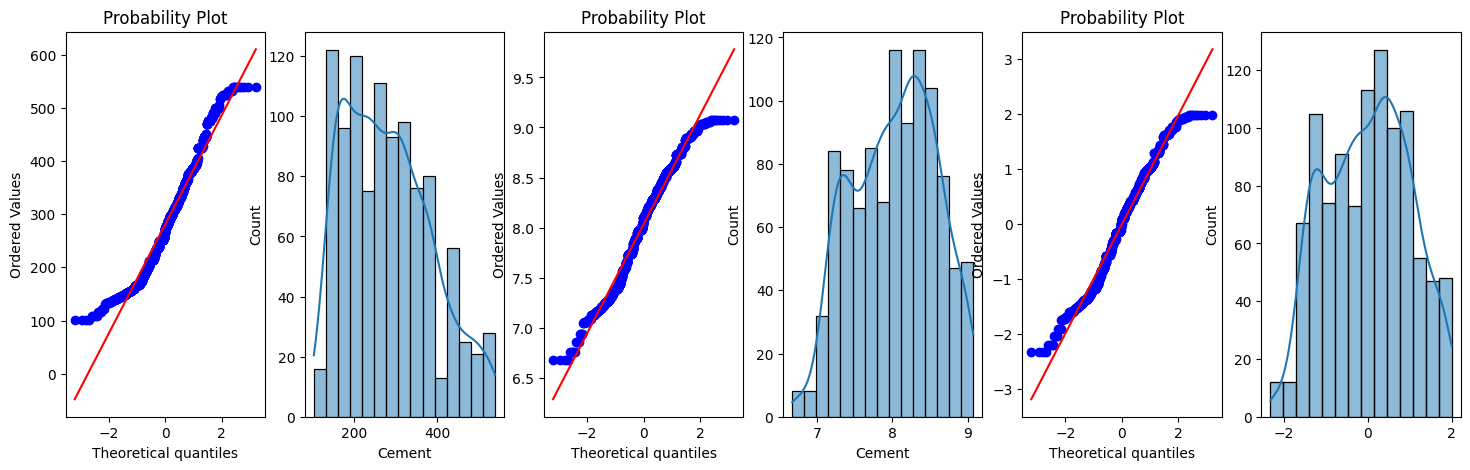

In [307]:
fig, axes = plt.subplots(1, 6, figsize=(18,5))
ax1 = axes[0]
ax2 = axes[1]
stats.probplot(df['Cement'],dist='norm',plot=ax1)
sns.histplot(df['Cement'],kde=True,ax=ax2)
print('1st data',np.round(df['Cement'].skew(),2))
function=FunctionTransformer(func=np.log2).transform(df['Cement'])
#fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax3 = axes[2]
ax4 = axes[3]
stats.probplot(function,dist='norm',plot=ax3)
sns.histplot(function,kde=True,ax=ax4)
print('after function transformation',np.round(function.skew(),2))
pt1=PowerTransformer()
pt=pt1.fit_transform(df[['Cement']])
#fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax5 = axes[4]
ax6 = axes[5]
stats.probplot(pt.flatten(),dist='norm',plot=ax5)
sns.histplot(pt.flatten(),kde=True,ax=ax6)
print('after power transformation',np.round(stats.skew(pt.flatten()),2))

1st data 0.8
after power transformation -0.03


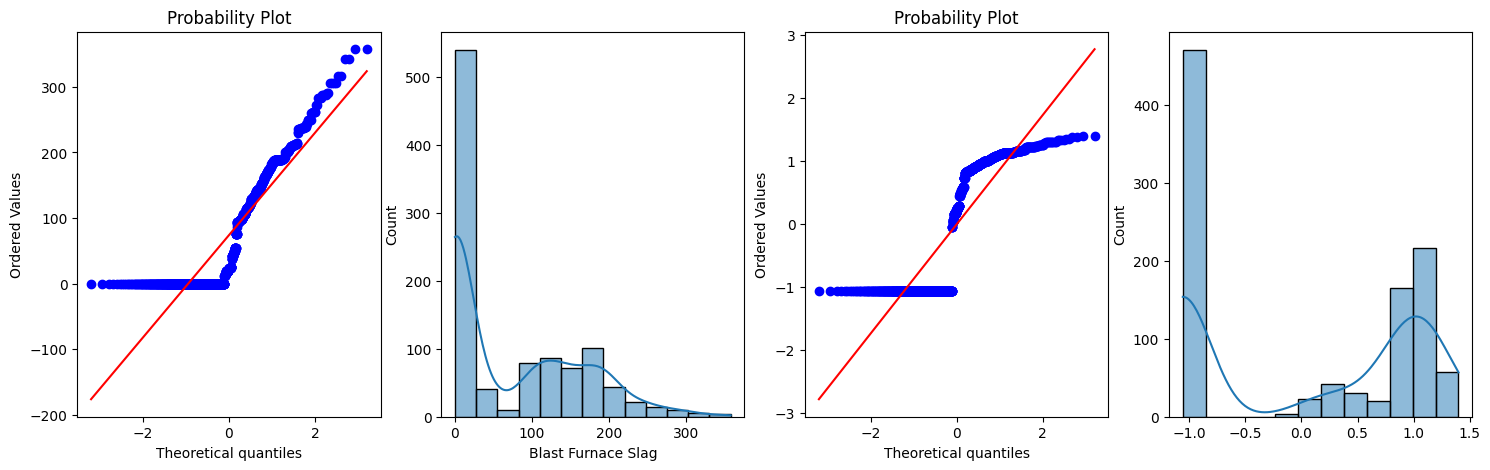

In [308]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
ax1 = axes[0]
ax2 = axes[1]
stats.probplot(df['Blast Furnace Slag'],dist='norm',plot=ax1)
sns.histplot(df['Blast Furnace Slag'],kde=True,ax=ax2)
print('1st data',np.round(df['Blast Furnace Slag'].skew(),2))
pt1=PowerTransformer()
pt=pt1.fit_transform(df[['Blast Furnace Slag']])
#fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax3 = axes[2]
ax4 = axes[3]
stats.probplot(pt.flatten(),dist='norm',plot=ax3)
sns.histplot(pt.flatten(),kde=True,ax=ax4)
print('after power transformation',np.round(stats.skew(pt.flatten()),2))

1st data 0.54
after power transformation 0.21


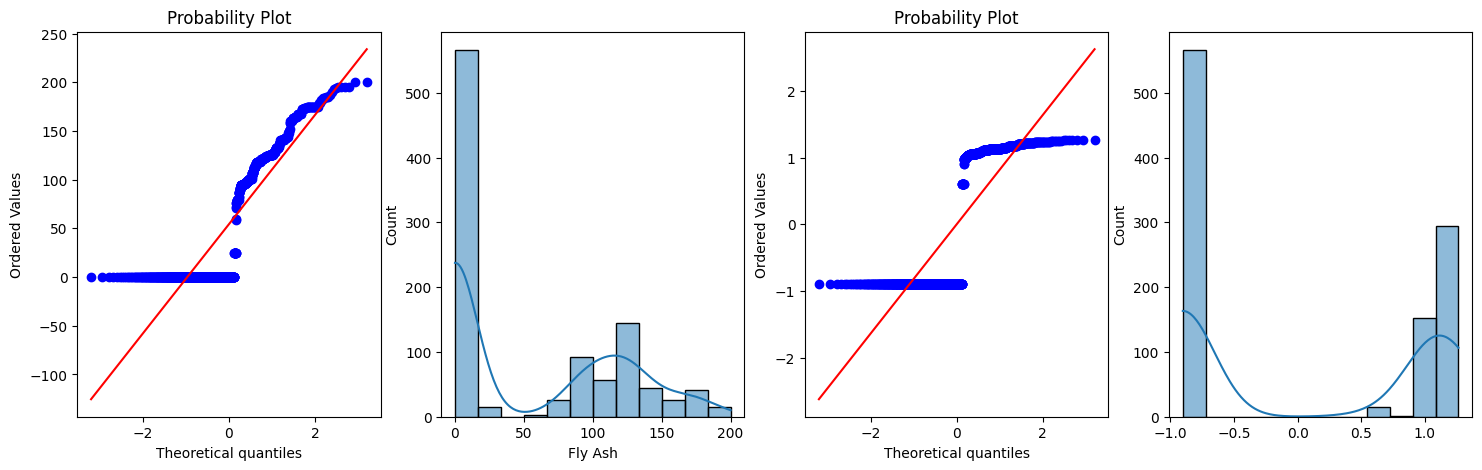

In [309]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
ax1 = axes[0]
ax2 = axes[1]
stats.probplot(df['Fly Ash'],dist='norm',plot=ax1)
sns.histplot(df['Fly Ash'],kde=True,ax=ax2)
print('1st data',np.round(df['Fly Ash'].skew(),2))
pt1=PowerTransformer()
pt=pt1.fit_transform(df[['Fly Ash']])
#fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax3 = axes[2]
ax4 = axes[3]
stats.probplot(pt.flatten(),dist='norm',plot=ax3)
sns.histplot(pt.flatten(),kde=True,ax=ax4)
print('after power transformation',np.round(stats.skew(pt.flatten()),2))

1st data 0.06
after function transformation -0.31
after power transformation 0.0


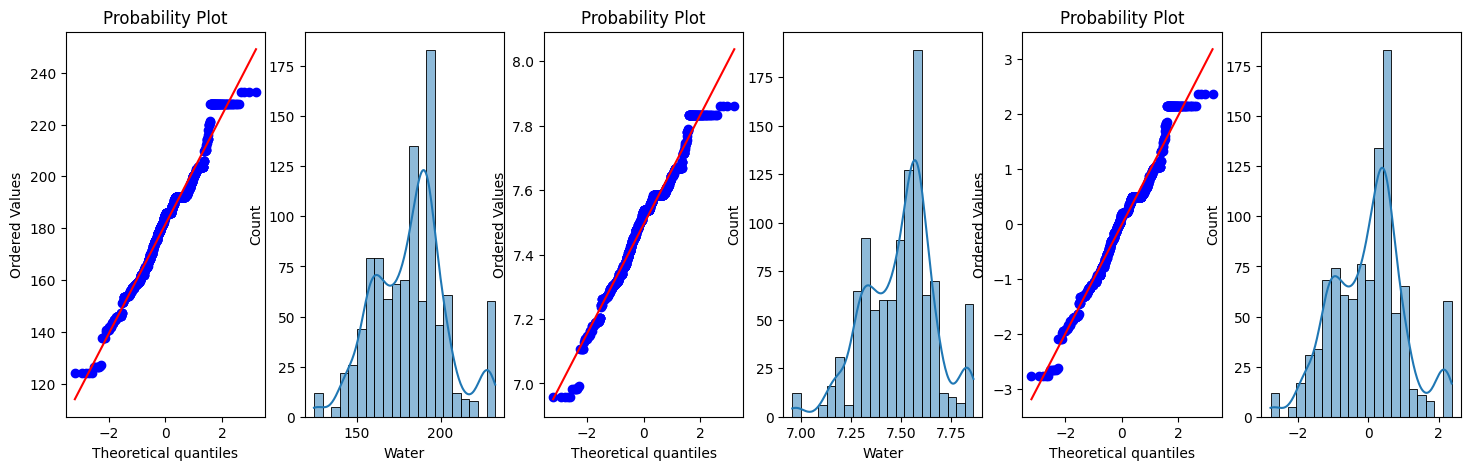

In [310]:
fig, axes = plt.subplots(1, 6, figsize=(18,5))
ax1 = axes[0]
ax2 = axes[1]
stats.probplot(df['Water'],dist='norm',plot=ax1)
sns.histplot(df['Water'],kde=True,ax=ax2)
print('1st data',np.round(df['Water'].skew(),2))
function=FunctionTransformer(func=np.log2).transform(df['Water'])
#fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax3 = axes[2]
ax4 = axes[3]
stats.probplot(function,dist='norm',plot=ax3)
sns.histplot(function,kde=True,ax=ax4)
print('after function transformation',np.round(function.skew(),2))
pt1=PowerTransformer()
pt=pt1.fit_transform(df[['Water']])
#fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax5 = axes[4]
ax6 = axes[5]
stats.probplot(pt.flatten(),dist='norm',plot=ax5)
sns.histplot(pt.flatten(),kde=True,ax=ax6)
print('after power transformation',np.round(stats.skew(pt.flatten()),2))

1st data 0.67
after power transformation -0.17


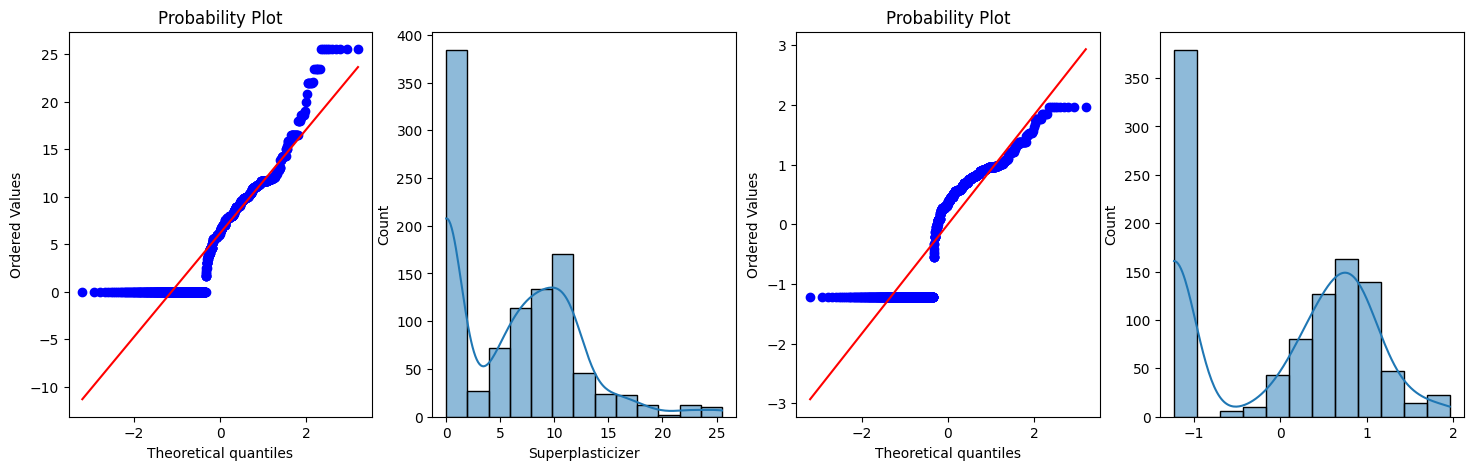

In [311]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
ax1 = axes[0]
ax2 = axes[1]
stats.probplot(df['Superplasticizer'],dist='norm',plot=ax1)
sns.histplot(df['Superplasticizer'],kde=True,ax=ax2)
print('1st data',np.round(df['Superplasticizer'].skew(),2))
pt1=PowerTransformer()
pt=pt1.fit_transform(df[['Superplasticizer']])
#fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax3 = axes[2]
ax4 = axes[3]
stats.probplot(pt.flatten(),dist='norm',plot=ax3)
sns.histplot(pt.flatten(),kde=True,ax=ax4)
print('after power transformation',np.round(stats.skew(pt.flatten()),2))

1st data -0.04
after function transformation -0.21
after power transformation -0.02


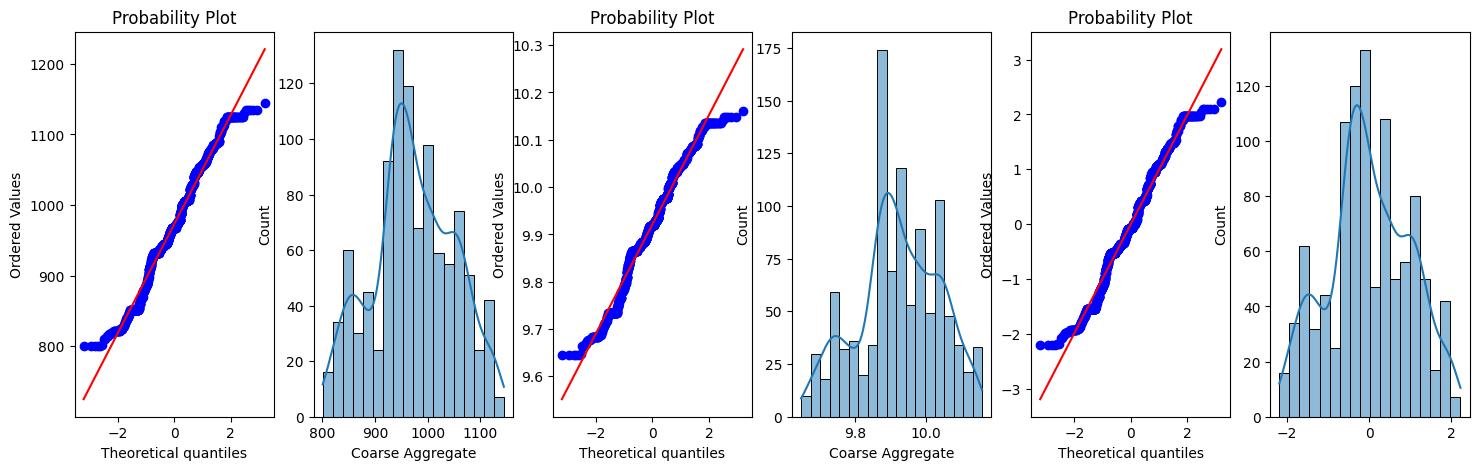

In [312]:
fig, axes = plt.subplots(1, 6, figsize=(18,5))
ax1 = axes[0]
ax2 = axes[1]
stats.probplot(df['Coarse Aggregate'],dist='norm',plot=ax1)
sns.histplot(df['Coarse Aggregate'],kde=True,ax=ax2)
print('1st data',np.round(df['Coarse Aggregate'].skew(),2))
function=FunctionTransformer(func=np.log2).transform(df['Coarse Aggregate'])
#fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax3 = axes[2]
ax4 = axes[3]
stats.probplot(function,dist='norm',plot=ax3)
sns.histplot(function,kde=True,ax=ax4)
print('after function transformation',np.round(function.skew(),2))
pt1=PowerTransformer()
pt=pt1.fit_transform(df[['Coarse Aggregate']])
#fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax5 = axes[4]
ax6 = axes[5]
stats.probplot(pt.flatten(),dist='norm',plot=ax5)
sns.histplot(pt.flatten(),kde=True,ax=ax6)
print('after power transformation',np.round(stats.skew(pt.flatten()),2))

1st data -0.29
after function transformation -0.56
after power transformation -0.02


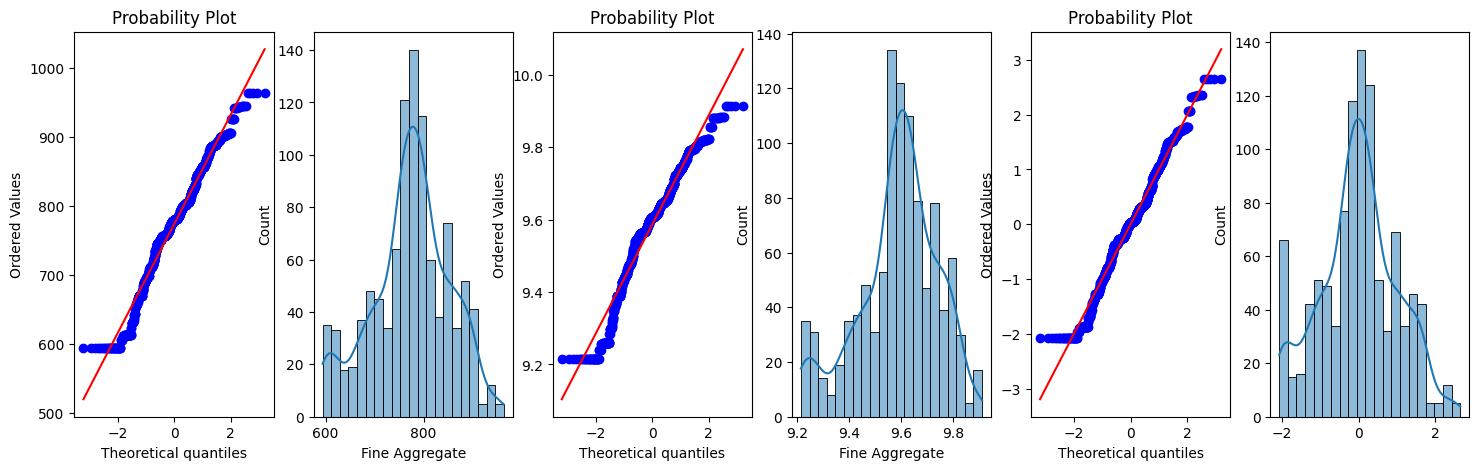

In [313]:
fig, axes = plt.subplots(1, 6, figsize=(18,5))
ax1 = axes[0]
ax2 = axes[1]
stats.probplot(df['Fine Aggregate'],dist='norm',plot=ax1)
sns.histplot(df['Fine Aggregate'],kde=True,ax=ax2)
print('1st data',np.round(df['Fine Aggregate'].skew(),2))
function=FunctionTransformer(func=np.log2).transform(df['Fine Aggregate'])
#fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax3 = axes[2]
ax4 = axes[3]
stats.probplot(function,dist='norm',plot=ax3)
sns.histplot(function,kde=True,ax=ax4)
print('after function transformation',np.round(function.skew(),2))
pt1=PowerTransformer()
pt=pt1.fit_transform(df[['Fine Aggregate']])
#fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax5 = axes[4]
ax6 = axes[5]
stats.probplot(pt.flatten(),dist='norm',plot=ax5)
sns.histplot(pt.flatten(),kde=True,ax=ax6)
print('after power transformation',np.round(stats.skew(pt.flatten()),2))

1st data 1.26
after function transformation -0.44
after power transformation -0.04


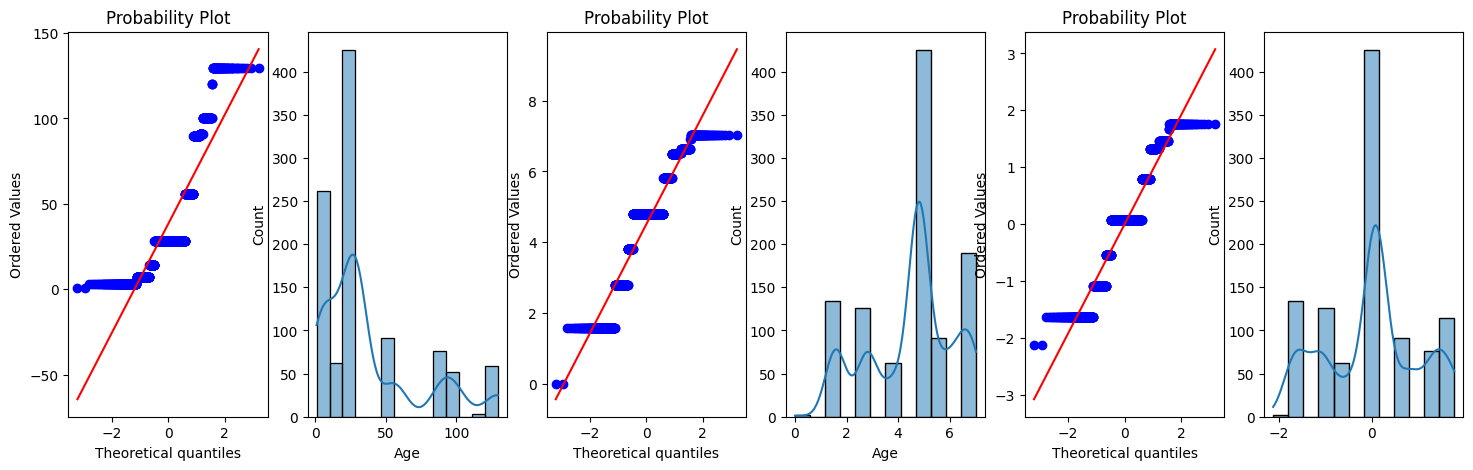

In [314]:
fig, axes = plt.subplots(1, 6, figsize=(18,5))
ax1 = axes[0]
ax2 = axes[1]
stats.probplot(df['Age'],dist='norm',plot=ax1)
sns.histplot(df['Age'],kde=True,ax=ax2)
print('1st data',np.round(df['Age'].skew(),2))
function=FunctionTransformer(func=np.log2).transform(df['Age'])
#fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax3 = axes[2]
ax4 = axes[3]
stats.probplot(function,dist='norm',plot=ax3)
sns.histplot(function,kde=True,ax=ax4)
print('after function transformation',np.round(function.skew(),2))
pt1=PowerTransformer()
pt=pt1.fit_transform(df[['Age']])
#fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax5 = axes[4]
ax6 = axes[5]
stats.probplot(pt.flatten(),dist='norm',plot=ax5)
sns.histplot(pt.flatten(),kde=True,ax=ax6)
print('after power transformation',np.round(stats.skew(pt.flatten()),2))

1st data 1.26
after function transformation -0.87
after power transformation -0.05


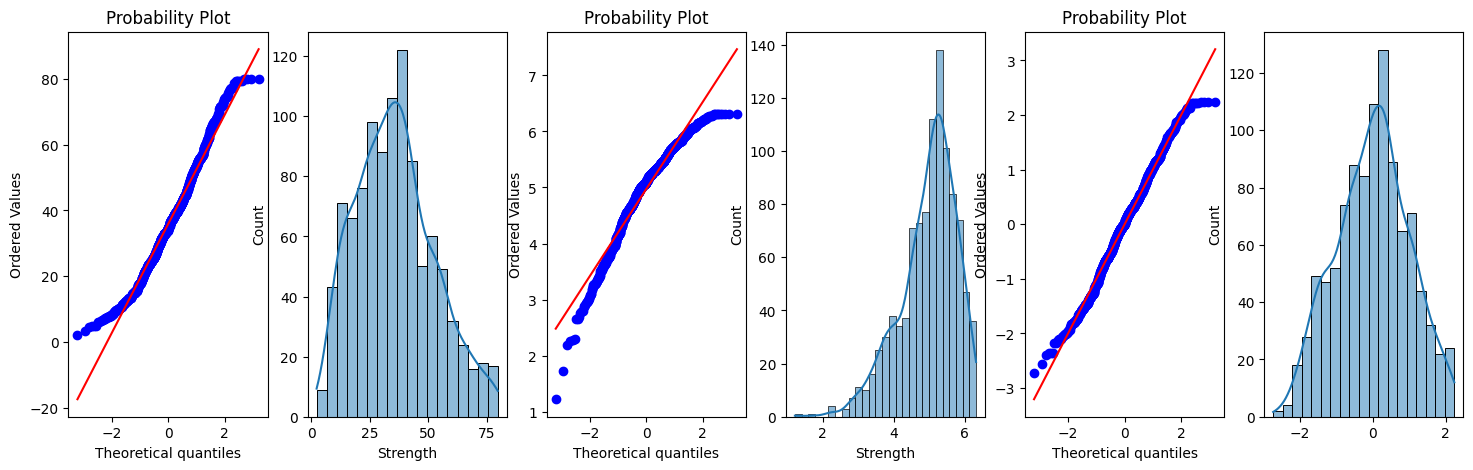

In [315]:
fig, axes = plt.subplots(1, 6, figsize=(18,5))
ax1 = axes[0]
ax2 = axes[1]
stats.probplot(df['Strength'],dist='norm',plot=ax1)
sns.histplot(df['Strength'],kde=True,ax=ax2)
print('1st data',np.round(df['Age'].skew(),2))
function=FunctionTransformer(func=np.log2).transform(df['Strength'])
#fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax3 = axes[2]
ax4 = axes[3]
stats.probplot(function,dist='norm',plot=ax3)
sns.histplot(function,kde=True,ax=ax4)
print('after function transformation',np.round(function.skew(),2))
pt1=PowerTransformer()
pt=pt1.fit_transform(df[['Strength']])
#fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax5 = axes[4]
ax6 = axes[5]
stats.probplot(pt.flatten(),dist='norm',plot=ax5)
sns.histplot(pt.flatten(),kde=True,ax=ax6)
print('after power transformation',np.round(stats.skew(pt.flatten()),2))

Out findings
1. We apply power transformation all columns as power transformation gives more close to normal distribution of data.

In [322]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0:8],df.iloc[:,8],test_size=0.1,random_state=705)

In [329]:
ct=ColumnTransformer([
    ('power transform',PowerTransformer(),[0,1,2,3,4,5,4,7])
],remainder='passthrough')

In [330]:
lr=LinearRegression()

In [335]:
pipe=make_pipeline(ct,lr)

In [337]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('power transform',
                                                  PowerTransformer(),
                                                  [0, 1, 2, 3, 4, 5, 4, 7])])),
                ('linearregression', LinearRegression())])

In [341]:
y_predict=pipe.predict(x_test)

We got these score by applying only Linear Regression

In [354]:
print('MAE', np.round(mean_absolute_error(y_test,y_predict),2))
print('MSE', np.round(mean_squared_error(y_test,y_predict),2))
print('RMSE', np.round(root_mean_squared_error(y_test,y_predict),2))
print('R2 score', np.round(r2_score(y_test,y_predict)*100,2))

MAE 5.44
MSE 46.53
RMSE 6.82
R2 score 85.33


In [365]:
rf=RandomForestRegressor(n_estimators=120)

In [366]:
pipe=make_pipeline(ct,rf)

In [367]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('power transform',
                                                  PowerTransformer(),
                                                  [0, 1, 2, 3, 4, 5, 4, 7])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=120))])

In [368]:
y_predict=pipe.predict(x_test)

We got this value by applying Random Forest

In [369]:
print('MAE', np.round(mean_absolute_error(y_test,y_predict),2))
print('MSE', np.round(mean_squared_error(y_test,y_predict),2))
print('RMSE', np.round(root_mean_squared_error(y_test,y_predict),2))
print('R2 score', np.round(r2_score(y_test,y_predict)*100,2))

MAE 3.13
MSE 17.4
RMSE 4.17
R2 score 94.51


In [377]:
kn=KNeighborsRegressor(n_neighbors=5)

In [378]:
pipe=make_pipeline(ct,kn).fit(x_train,y_train)

In [379]:
y_predict=pipe.predict(x_test)

We got this value by applying Kneighbors Regression

In [380]:
print('MAE', np.round(mean_absolute_error(y_test,y_predict),2))
print('MSE', np.round(mean_squared_error(y_test,y_predict),2))
print('RMSE', np.round(root_mean_squared_error(y_test,y_predict),2))
print('R2 score', np.round(r2_score(y_test,y_predict)*100,2))

MAE 8.53
MSE 116.21
RMSE 10.78
R2 score 63.36


In [383]:
vt=VotingRegressor(estimators=[('lr',LinearRegression()),('rn',RandomForestRegressor()),('decision',DecisionTreeRegressor())])

In [384]:
pipe=make_pipeline(ct,vt).fit(x_train,y_train)

In [385]:
y_predict=pipe.predict(x_test)

We got this value by applying voting regression

In [386]:
print('MAE', np.round(mean_absolute_error(y_test,y_predict),2))
print('MSE', np.round(mean_squared_error(y_test,y_predict),2))
print('RMSE', np.round(root_mean_squared_error(y_test,y_predict),2))
print('R2 score', np.round(r2_score(y_test,y_predict)*100,2))

MAE 3.11
MSE 16.97
RMSE 4.12
R2 score 94.65


In [397]:
bg=BaggingRegressor(estimator=RandomForestRegressor(),n_estimators=20)

In [398]:
pipe=make_pipeline(ct,bg).fit(x_train,y_train)

In [399]:
y_predict=pipe.predict(x_test)

We got this values for Bagging Regression

In [400]:
print('MAE', np.round(mean_absolute_error(y_test,y_predict),2))
print('MSE', np.round(mean_squared_error(y_test,y_predict),2))
print('RMSE', np.round(root_mean_squared_error(y_test,y_predict),2))
print('R2 score', np.round(r2_score(y_test,y_predict)*100,2))

MAE 3.56
MSE 21.85
RMSE 4.67
R2 score 93.11


In [425]:
gbc=GradientBoostingRegressor(n_estimators=2000,learning_rate=0.08)

In [426]:
pipe=make_pipeline(ct,gbc).fit(x_train,y_train)

In [427]:
y_predict=pipe.predict(x_test)

We got this values for Gradient boosting

In [428]:
print('MAE', np.round(mean_absolute_error(y_test,y_predict),2))
print('MSE', np.round(mean_squared_error(y_test,y_predict),2))
print('RMSE', np.round(root_mean_squared_error(y_test,y_predict),2))
print('R2 score', np.round(r2_score(y_test,y_predict)*100,2))

MAE 2.61
MSE 11.86
RMSE 3.44
R2 score 96.26
